In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from fastai.vision.all import *

In [103]:
train_df=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/Train (6).csv")
test_df=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/Test (8).csv")
sub=pd.read_csv("../input/microsoft-rice-disease-classification-challenge/SampleSubmission (4).csv")

In [104]:
test_df

,Image_id
0,id_00vl5wvxq3.jpg
1,id_00vl5wvxq3_rgn.jpg
2,id_01hu05mtch.jpg
3,id_01hu05mtch_rgn.jpg
4,id_030ln10ewn.jpg
...,...
2285,id_ztvp2l9k3h_rgn.jpg
2286,id_zwwcma7hlt.jpg
2287,id_zwwcma7hlt_rgn.jpg
2288,id_zyo7m4fj8h.jpg


In [105]:
train_df

,Image_id,Label
0,id_004wknd7qd.jpg,blast
1,id_004wknd7qd_rgn.jpg,blast
2,id_005sitfgr2.jpg,brown
3,id_005sitfgr2_rgn.jpg,brown
4,id_00stp9t6m6.jpg,blast
...,...,...
5335,id_zz6gzk7p97_rgn.jpg,brown
5336,id_zz8ca2p67e.jpg,blast
5337,id_zz8ca2p67e_rgn.jpg,blast
5338,id_zzt8y9q0x0.jpg,brown


In [106]:
Id=test_df["Image_id"]

In [107]:
train_df.Label.unique()

array(['blast', 'brown', 'healthy'], dtype=object)

In [108]:
train_df.Label.value_counts()

blast      2988
brown      1532
healthy     820
Name: Label, dtype: int64

In [109]:
# dls = ImageDataLoaders.from_df(train_df,bs=32, path='../input/microsoft-rice-disease-classification-challenge/Images (1)/', num_workers=-1) # See the docs for adding augmentations etc
# dls.show_batch() 


In [110]:
path='../input/microsoft-rice-disease-classification-challenge/Images (1)/'
img_paths = []
for i in train_df.Image_id:
    img_paths.append(path + i)
train_df['path'] = img_paths

In [111]:
train_df

,Image_id,Label,path
0,id_004wknd7qd.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd.jpg
1,id_004wknd7qd_rgn.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd_rgn.jpg
2,id_005sitfgr2.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2.jpg
3,id_005sitfgr2_rgn.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2_rgn.jpg
4,id_00stp9t6m6.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_00stp9t6m6.jpg
...,...,...,...
5335,id_zz6gzk7p97_rgn.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz6gzk7p97_rgn.jpg
5336,id_zz8ca2p67e.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e.jpg
5337,id_zz8ca2p67e_rgn.jpg,blast,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e_rgn.jpg
5338,id_zzt8y9q0x0.jpg,brown,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zzt8y9q0x0.jpg


In [112]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

train_df= pd.get_dummies(train_df, columns = ["Label"])

In [113]:
train_df

,Image_id,path,Label_blast,Label_brown,Label_healthy
0,id_004wknd7qd.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd.jpg,1,0,0
1,id_004wknd7qd_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_004wknd7qd_rgn.jpg,1,0,0
2,id_005sitfgr2.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2.jpg,0,1,0
3,id_005sitfgr2_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_005sitfgr2_rgn.jpg,0,1,0
4,id_00stp9t6m6.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_00stp9t6m6.jpg,1,0,0
...,...,...,...,...,...
5335,id_zz6gzk7p97_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz6gzk7p97_rgn.jpg,0,1,0
5336,id_zz8ca2p67e.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e.jpg,1,0,0
5337,id_zz8ca2p67e_rgn.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zz8ca2p67e_rgn.jpg,1,0,0
5338,id_zzt8y9q0x0.jpg,../input/microsoft-rice-disease-classification-challenge/Images (1)/id_zzt8y9q0x0.jpg,0,1,0


In [114]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

In [115]:
train_generator = train_datagenerator.flow_from_dataframe(
    train_df, 
    x_col='path', 
    y_col=['Label_blast',"Label_brown","Label_healthy"],
    target_size=(224, 224), 
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    train_df , 
    x_col='path',
    y_col=['Label_blast',"Label_brown","Label_healthy"],
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation')

Found 4806 validated image filenames.
Found 534 validated image filenames.


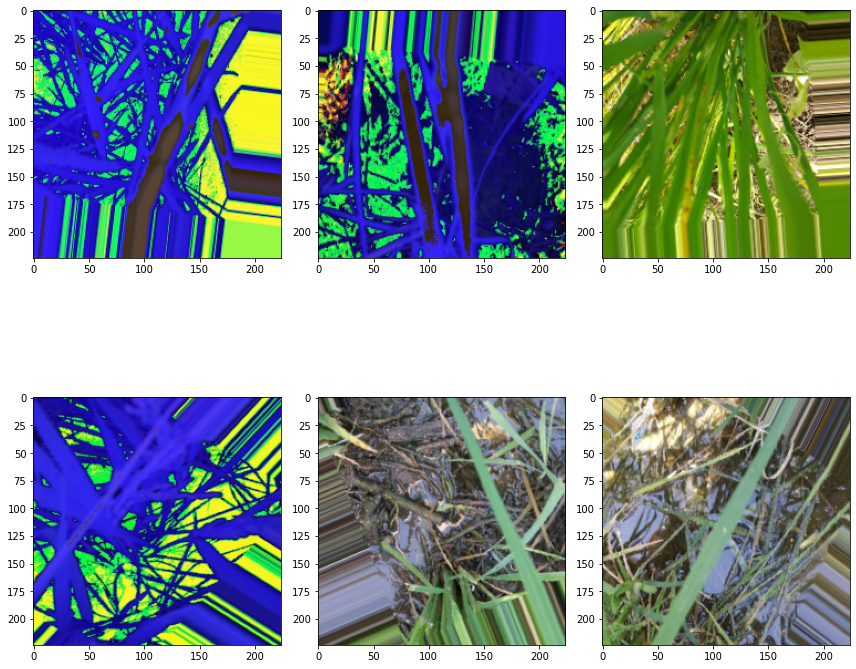

In [116]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [117]:
train_df=train_df.drop("Image_id", axis=1, inplace=True)

In [118]:
# import tensorflow as tf
# def focal_loss(gamma=2., alpha=4.):
#      gamma = float(gamma)
#      alpha = float(alpha)
#      def focal_loss_fixed(y_true, y_pred):
#          """Focal loss for multi-classification
#          FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
#          Notice: y_pred is probability after softmax
#          gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
#          d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
#          Focal Loss for Dense Object Detection
#          https://arxiv.org/abs/1708.02002
#          Arguments:
#              y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
#              y_pred {tensor} -- model's output, shape of [batch_size, num_cls]
#          Keyword Arguments:
#              gamma {float} -- (default: {2.0})
#              alpha {float} -- (default: {4.0})
#          Returns:
#              [tensor] -- loss.
#          """
#          epsilon = 1.e-9
#          y_true = tf.convert_to_tensor(y_true, tf.float32)
#          y_pred = tf.convert_to_tensor(y_pred, tf.float32)
#          model_out = tf.add(y_pred, epsilon)
#          ce = tf.multiply(y_true, -tf.log(model_out))
#          weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
#          fl = tf.multiply(alpha, tf.multiply(weight, ce))
#          reduced_fl = tf.reduce_max(fl, axis=1)
#          return tf.reduce_mean(reduced_fl)
#      return focal_loss_fixed

In [119]:
import tensorflow_addons as tfa


In [120]:
# model = ks.models.Sequential()

# model.add(ks.layers.Dense(4, input_shape=(120, 120, 3)))

# model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(ks.layers.MaxPooling2D(2, 2))

# model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(ks.layers.MaxPooling2D(2, 2))


# model.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(ks.layers.MaxPooling2D(2, 2))

# model.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(ks.layers.MaxPooling2D(2, 2))
# model.add(ks.layers.Dropout(0.2))

        
# model.add(ks.layers.Flatten())
        
# model.add(ks.layers.Dense(1024, activation='relu'))

# model.add(ks.layers.Dense(3, activation='softmax'))

# model.compile(optimizer='adam',
#               loss=tfa.losses.SigmoidFocalCrossEntropy(),
#               metrics=['acc'])

Use focal loss

In [121]:
# batch_size=15
# FAST_RUN = False
# epochs=5 if FAST_RUN else 100
# history = model.fit_generator(
#     train_generator, 
#     epochs=epochs,
#     validation_data=validation_generator
# )

In [122]:
# from PIL import Image
# L=[]
# L0=[]
# L1=[]
# L2=[]
# for i in range(test_df.shape[0]//2):
#     index=i*2
#     img_path = test_df.loc[index,"Image_id"]
#     path = "../input/microsoft-rice-disease-classification-challenge/Images (1)/" + img_path
#     img = np.array(Image.open(path).resize((120,120))).reshape((1, 120, 120, 3))
#     out = model(img)
# #     print(out)
# #     print(tf.get_static_value(tf.math.argmax(out, axis=1)))
#     L.append(tf.get_static_value(tf.math.argmax(out, axis=1)))

In [123]:
# L0=[]
# L1=[]
# L2=[]
# for i in L :
#         if i ==0 :
#             L0.append(1)
#             L0.append(1)
#             L1.append(0)
#             L1.append(0)
#             L2.append(0)
#             L2.append(0)
#         elif i ==1 :
#             L0.append(0)
#             L0.append(0)
#             L1.append(1)
#             L1.append(1)
#             L2.append(0)
#             L2.append(0)
#         elif i==2 :
#             L0.append(0)
#             L0.append(0)
#             L1.append(0)
#             L1.append(0)
#             L2.append(1)
#             L2.append(1)

In [124]:
# submission=pd.DataFrame({"Image_id":Id,"blast":L0,"brown":L1,"healthy":L2})
# submission.to_csv("sub3.csv", index=False)

In [125]:
# from keras.layers import Input, Conv2D, MaxPooling2D
# from keras.layers import Dense, Flatten
# from keras.models import Model

# _input = Input((120, 120, 3)) 

# conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
# conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
# pool1  = MaxPooling2D((2, 2))(conv2)

# conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
# conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
# pool2  = MaxPooling2D((2, 2))(conv4)

# conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
# conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
# conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
# pool3  = MaxPooling2D((2, 2))(conv7)

# conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
# conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
# conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
# pool4  = MaxPooling2D((2, 2))(conv10)

# conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
# conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
# conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
# pool5  = MaxPooling2D((2, 2))(conv13)

# flat   = Flatten()(pool5)
# dense1 = Dense(4096, activation="relu")(flat)
# dense2 = Dense(4096, activation="relu")(dense1)
# output = Dense(3, activation="softmax")(dense2)

# vgg16_model  = Model(inputs=_input, outputs=output)


In [126]:
# vgg16_model.compile(optimizer='adam',
#               loss=tfa.losses.SigmoidFocalCrossEntropy(),
#               metrics=['acc'])

In [127]:
# batch_size=15
# FAST_RUN = False
# epochs=5 if FAST_RUN else 100
# history = vgg16_model.fit_generator(
#     train_generator, 
#     epochs=epochs,
#     validation_data=validation_generator
# )

In [128]:
# from PIL import Image
# L=[]
# L0=[]
# L1=[]
# L2=[]
# for i in range(test_df.shape[0]//2):
#     index=i*2
#     img_path = test_df.loc[index,"Image_id"]
#     path = "../input/microsoft-rice-disease-classification-challenge/Images (1)/" + img_path
#     img = np.array(Image.open(path).resize((120,120))).reshape((1, 120, 120, 3))
#     out = vgg16_model(img)
# #     print(out)
# #     print(tf.get_static_value(tf.math.argmax(out, axis=1)))
#     L.append(tf.get_static_value(tf.math.argmax(out, axis=1)))

In [129]:
# L0=[]
# L1=[]
# L2=[]
# for i in L :
#         if i ==0 :
#             L0.append(1)
#             L0.append(1)
#             L1.append(0)
#             L1.append(0)
#             L2.append(0)
#             L2.append(0)
#         elif i ==1 :
#             L0.append(0)
#             L0.append(0)
#             L1.append(1)
#             L1.append(1)
#             L2.append(0)
#             L2.append(0)
#         elif i==2 :
#             L0.append(0)
#             L0.append(0)
#             L1.append(0)
#             L1.append(0)
#             L2.append(1)
#             L2.append(1)

In [130]:
# submission=pd.DataFrame({"Image_id":Id,"blast":L0,"brown":L1,"healthy":L2})
# submission.to_csv("sub5.csv", index=False)

****

In [143]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# vgg16_weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# vgg16_model = VGG16(weights=vgg16_weights)
model = VGG16(include_top=False, input_shape=(224, 224, 3))
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [144]:
model.compile(optimizer='adam',
              loss=tfa.losses.SigmoidFocalCrossEntropy(),
              metrics=['acc'])

In [ ]:
batch_size=15
FAST_RUN = False
epochs=5 if FAST_RUN else 100
history =model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/100
 87/151 [================>.............] - ETA: 1:50 - loss: 6.5868 - acc: 0.5606